# Assignment 2 - Probability and Statistics, Ethics and privacy

This assignment is worth 10% of your final grade.

It is due at **6pm on Thursday 17 August**, and should be submitted as a single Jupyter Notebook, through the "Assignment 2" link in Blackboard

The assignment makes use of the `scipy.stats` package and the `statsmodels.formula.api` package.  It draws on material from Weeks 3 and 4, lectured by Richard Arnold.

When answering questions show any relevant Python code along with your answers.

Also when asked for numerical answers, make sure you quote these explicitly.  e.g. if the answer to a question is just one value from a table, make sure you explicitly refer to that value so that it is clear that you know which is the relevant entry in the table.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as pl
#%matplotlib inlineb

# Privacy, Security, Confidentiality and Ethics

1\. The Integrated Data Infrastructure (IDI) created by Statistics New Zealand links data from a variety of different sources, and is used as a policy research tool.

Find out about the IDI by reading materials from the Statistics NZ website, and also read this article:
https://i.stuff.co.nz/national/300630922/the-government-has-built-a-data-colossus--is-it-playing-with-fire
about the IDI before answering the following questions.

   (a) In a paragraph of writing (150-200 words), discuss the Privacy, Security and Confidentiality issues that arise in the creation and operation of the IDI, and how these issues are handled.
   
   A privacy issue associated with the IDI is the fact that many people do not actually know about the IDI's existence, and that their data is being collected from governmental services, NGOs, and surveys to be used in one large database. Moreover, people do not know who is using this data, and what this data gets used for. A security issue is the choosing of who gets to use and analyze this data. It cannot be just anyone for any reason. For confidentiality, people will get worried if the data used in the IDI contains so much information as to pinpoint which datapoint correlates to which person exactly. To combat these, Statistics NZ has the "Five Safes" framework (safe people, safe projects, safe settings, safe data, safe output). Only approved researchers can access the IDI with restrictions, such as not having access to the internet while analyzing data, to protect the data's security. Research must only be done on groups and not on individuals to avoid identification. Identifying information such as IRD numbers and addresses, are either encrypted or removed, to protect confidentiality of individual people. Statistics NZ approves the output of the data to ensure identification is not possible.
   
   (b) In a few sentences give your view of the risks associated with the IDI, specifically referring to the Social Licence.
   
   There is a risk that malicious actors may end up using the data for their own personal gain under the guise of research, and that data could still somehow be identifiable to both researchers and malicious actors. While the Social License does its best to quell people's worries about the data and how it can be used, there may still be people who object to their data being in the database at all out of privacy concerns. I personally feel the data is being handled as adequately as possible, but sometimes the best security practices can fail.
   
[8 Marks (6+2)]

2\. Consider the following table of counts of age and political affiliation (left-right) in a small community (the data are in RiskyTable.csv)

In [2]:
rtab = pd.read_csv("RiskyTable.csv")
rtab

,Age Group,Left learning,Centre-left,Centre-right,Right leaning,Total
0,15-24,1,0,0,1,2
1,25-34,2,0,0,0,2
2,35-44,1,3,4,3,11
3,45-54,0,4,3,1,8
4,55-64,1,0,3,2,6
5,65+,2,7,3,2,14
6,Total,7,14,13,9,43


(a) Assuming that people within this community either know or can easily guess each other's ages, but don't know each other's political beliefs, give a brief discussion of the confidentiality risks posed by this table.  Identify the riskiest cells, contrasting the risks for informed and uninformed adversaries/intruders.  [2 Marks]

The riskiest cells are the cells (Left leaning, 15-24), (Right leaning, 15-24) and (Left leaning, 25-34). Because so few people are in these rows, it can be easy for informed intruders to know which four people these are. They will instantly know which two 25-34 year olds are left leaning, and could guess at which two 15-24 year olds are left and right leaning if they know one of the two well enough. Uninformed intruders could use data from other places to find out which people these cells represent, such as census data on this community.

(b) How could the table be made less risky if it is to be released?  Recreate the table and show the output of one method of doing so. (The easiest way to show your new table is to edit RiskyTable.csv, read it in again, and display it in your Python notebook output.)  [3 Marks]

In [3]:
rtab2 = pd.DataFrame({'Age Group':['15-24', '25-34', '35-44', '45-54','55-64','65+','Total'],
                     'Left leaning':[3,0,0,0,0,3,6],
                     'Centre-left':[0,0,3,3,0,6,15],
                     'Centre-right':[0,0,3,3,0,0,9],
                     'Right leaning':[0,0,3,0,0,0,9],
                     'Total':[3,3,12,6,6,15,42]})
rtab2

,Age Group,Left leaning,Centre-left,Centre-right,Right leaning,Total
0,15-24,3,0,0,0,3
1,25-34,0,0,0,0,3
2,35-44,0,3,3,3,12
3,45-54,0,3,3,0,6
4,55-64,0,0,0,0,6
5,65+,3,6,0,0,15
6,Total,6,15,9,9,42


I used the Statistics NZ method of random rounding. Cells and marginals will have their cells rounded to a multiple of three (cells with an existing multiple of 3 are unchanged). Cells will have a 1/3 chance of being rounded to the farthest multiple of 3 and a 2/3 chance of being rounded to the nearest multiple of three. To decide this, I used a die, where a roll of 1 or 2 dictates rounding to the farthest multiple, and others a rounding to the nearest.

This makes it less likely to identify people, as counts will be slightly inaccurate, but not so much that the data is completely changed and becomes unreliable.

# Probability distributions

Note: 

  * A **probability mass function** $P(X=x)$ is the probability that a discrete or categorical random variable $X$ takes a particular value $x$
  * A **cumulative distribution function** $P(X\leq x)$ is the probability that a numerical random variable $X$ (which can be discrete or continuous) takes a value less than or equal to a particular value $x$.


3\. A Poisson random variable is often used to model counts of customer arrivals in a shop.  Assume that the number of customers to arrive in any given hour follows a Poisson(4) distribution.  Compute and plot the probabililty distribution of a Poisson(4) distribution.  (Plot the distribution over the range 0 to 15.)  [3 Marks]


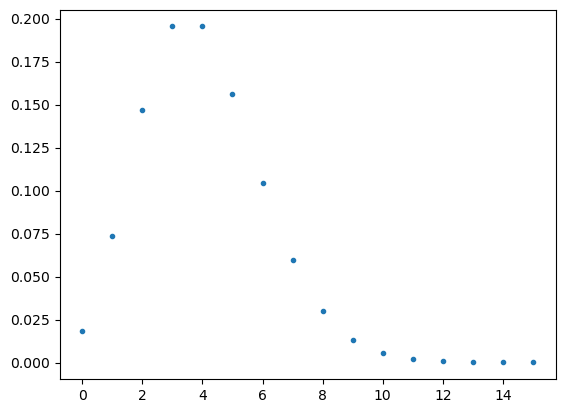

In [4]:
x = np.arange(0,16)
pl.plot(x, stats.poisson.pmf(x, 4), '.')

4\.  What is the **support** or **sample space** of the Poisson(4) distribution?  [1 Mark]

Sample space: [0-15]

5\. Use the vector of probabilities to calculate the expected (mean) value of $X$. i.e. on average how many customers arrive per hour in this shop?  [1 Mark]

In [5]:
probs = stats.poisson.pmf(x, 4)
probs_mean = 0
for n in x:
    probs_mean = probs_mean + n*probs[n]
probs_mean    

3.999920273090068

About 4 customers per hour.

6\. What is the probability that $X$ is 3, i.e. that exactly 3 customers arrive in the shop in a given hour?  [1 Mark]

In [6]:
prob_pmf = stats.poisson.pmf(3, 4)
prob_pmf

0.19536681481316454

7\. What is the probability that $X$ is less than or equal to 3? [1 Mark]

In [7]:
prob_cdf = stats.poisson.cdf(4, 4) #as cdf computes X<x
prob_cdf

0.6288369351798734

8\. What is the probability that $X$ is more than 3 but less than 6?  [1 Mark]

In [8]:
prob_difference = stats.poisson.cdf(7, 4) - stats.poisson.cdf(4, 4)
prob_difference

0.32002944902727937

## Probabilities from Data

Read the Spotify_Song_Attributes.csv data set of characteristics of 10080 songs on the Spotify music streaming platform, which you can download from Canvas.

You will also need to consult the accompanying information file Spotify-Information.csv in order to interpret the content of the data set.

Sourced from: B. Senopati, "Harmonizing the Hits: Analyzing the Spotify Song Attributes Dataset" https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes

In [9]:
spotify_songs = pd.read_csv("Spotify_Song_Attributes.csv")

9\. Treating this data set as a random sample of all songs on the platform, estimate the proportion of Spotify songs that have a time signature of 4.  [1 Mark]

In [10]:
time_signature = spotify_songs['time_signature'].value_counts().sort_index()
ts_dist = pd.DataFrame({'counts':time_signature})
proportion_estimate = time_signature[4.0] / spotify_songs.shape[0]
proportion_estimate

0.8563492063492063

10\. What is the probability that a song is both in a minor key (minor mode) and has a time signature of 3? [1 Mark]

In [11]:
prob_minor_three = pd.crosstab(spotify_songs['time_signature'], spotify_songs['mode'], 
                               margins=True, margins_name='Total', normalize='all')
prob_minor_three

mode,0.0,1.0,Total
time_signature,,,
0.0,0.000210,0.000210,0.000420
1.0,0.002308,0.004617,0.006925
3.0,0.024554,0.048898,0.073452
4.0,0.354250,0.551522,0.905771
5.0,0.006296,0.007135,0.013431
Total,0.387618,0.612382,1.000000


Probability: 0.024554

11\. What is the probability that a song is in a minor key given that it has a time signature of 3? [1 Mark]

In [12]:
#P(M|T) where M is minor key and T is time signature of three
prob_minor_three_given_1 = pd.crosstab(spotify_songs['time_signature'], spotify_songs['mode'], 
                               margins=True, margins_name='Total', normalize='index')
prob_minor_three_given_1

mode,0.0,1.0
time_signature,,
0.0,0.500000,0.500000
1.0,0.333333,0.666667
3.0,0.334286,0.665714
4.0,0.391103,0.608897
5.0,0.468750,0.531250
Total,0.387618,0.612382


Probability: 0.334286

12\. What is the probability that a song has a time signature of 3 given that it is in a minor key? [1 Mark]

In [13]:
#P(T|M) 
prob_minor_three_given_2 = pd.crosstab(spotify_songs['time_signature'], spotify_songs['mode'], 
                               margins=True, margins_name='Total', normalize='columns')
prob_minor_three_given_2

mode,0.0,1.0,Total
time_signature,,,
0.0,0.000541,0.000343,0.000420
1.0,0.005956,0.007539,0.006925
3.0,0.063346,0.079849,0.073452
4.0,0.913914,0.900617,0.905771
5.0,0.016243,0.011652,0.013431


Probability: 0.063346

## Model Fitting

Use the Spotify data for the remaining questions on Model Fitting

13\. Draw a scatter plot of the Energy of each song (on the x-axis) and its Loudness.  Using different colours or different plot symbols, distinguish the songs that have a time signature of 4 (four beats per bar) from all other time signatures. [3 Marks]

<AxesSubplot:xlabel='energy', ylabel='loudness'>

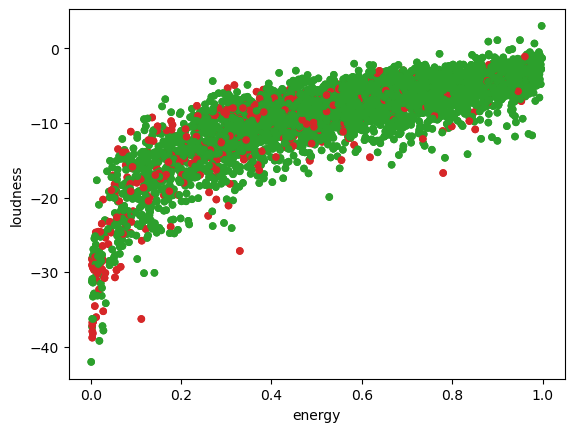

In [14]:
#time signature of 4 has a green colour
cols = np.where(spotify_songs['time_signature']==4,'tab:green','tab:red')
spotify_songs.plot.scatter(x='energy', y='loudness', c=cols)

14\. Create a new column, logEnergy, in the data set.  Draw a scatter plot of the log of the Energy of each song on the x-axis and its Loudness on the y-axis.  Again distinguish songs with 4 beats per bar from all other time signatures. [1 Mark]

<AxesSubplot:xlabel='logEnergy', ylabel='loudness'>

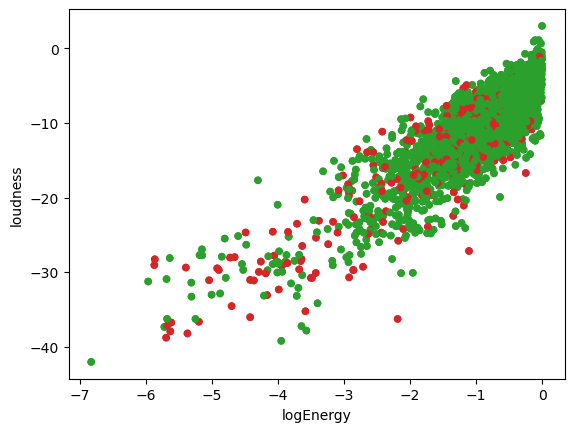

In [15]:
spotify_songs['logEnergy'] = np.log(spotify_songs['energy'])
spotify_songs.plot.scatter(x='logEnergy', y='loudness', c=cols)

15\. The graph after the log transformation looks very different: why are the logged data more suitable for model fitting than the original data?  [1 Mark]

We can fit a linear model better on the logged data than on the original data. The logged data will have smaller residuals, less funnelling of the residuals, and moreso equal variances.

16\. Fit a regression model for loudness as predicted by log Energy.  

  (a) Print out a summary of the model fit
  
  (b) Plot the fitted curve onto the data
  
  (c) Draw a scatter plot of the residuals and comment on them
  
[7 Marks]

In [16]:
x = spotify_songs['logEnergy']
y = spotify_songs['loudness']
fittedmodel = smf.ols(formula="loudness ~ logEnergy", data=spotify_songs).fit() 
fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loudness   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 3.372e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:38:07   Log-Likelihood:                -22411.
No. Observations:                9530   AIC:                         4.483e+04
Df Residuals:                    9528   BIC:                         4.484e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0528      0.036   -111.798      0.000      -4.124      -3.982
logEnergy      6.1516      0.033    183.639      0.000       6.086       6.217
==============================================================================
Omnibus:                     1633.477   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5808.754
Skew:                          -0.843   Prob(JB):                         0.00
Kurtosis:                       6.433   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

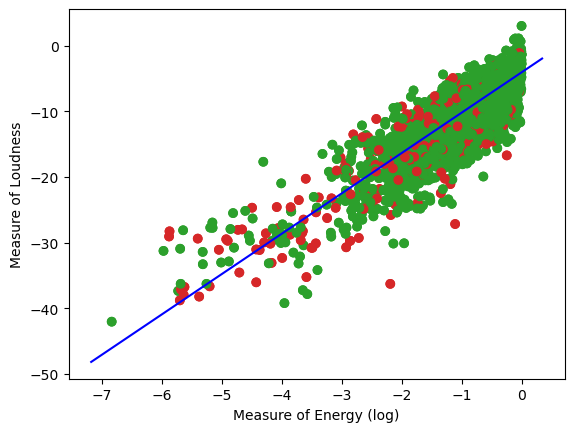

In [17]:
fig, ax = pl.subplots(1,1)
pl.scatter(x, y, marker='o', c=cols);
ax.set(xlabel='Measure of Energy (log)', ylabel='Measure of Loudness');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin, xmax]
xp_array = np.array(xp)
xpmat = pd.DataFrame({'logEnergy':xp})
yp = fittedmodel.predict(xpmat)
yp_array = np.array(yp)
pl.plot(xp_array, yp_array, 'b-');

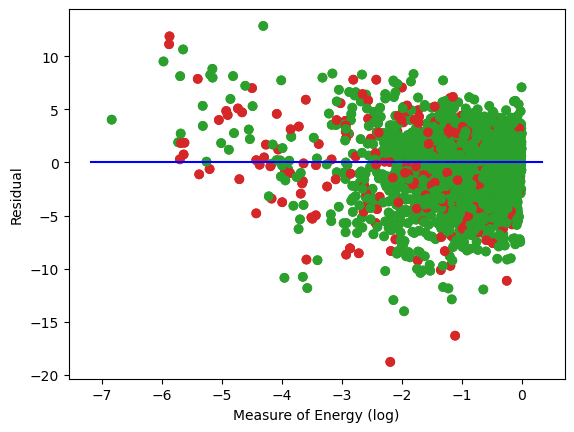

In [18]:
predictions = fittedmodel.predict(spotify_songs)
residuals = y - predictions
fig, ax = pl.subplots(1,1)
pl.scatter(x, residuals, marker='o', c=cols);
ax.set(xlabel='Measure of Energy (log)', ylabel='Residual');
xmin, xmax = ax.get_xbound() 
xp = [xmin,xmax] 
yp = [0, 0]
pl.plot(xp, yp, 'b-');

Variance is not concept as seen by the wide residuals on the residual graph. This means that the regression model is not a good fit for the log-transformed data.

17\. Try adding a quadratic term to the fit, and see if that improves the fit. [3 Marks]

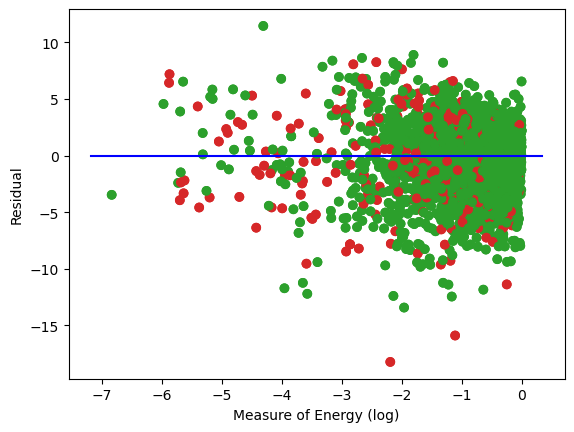

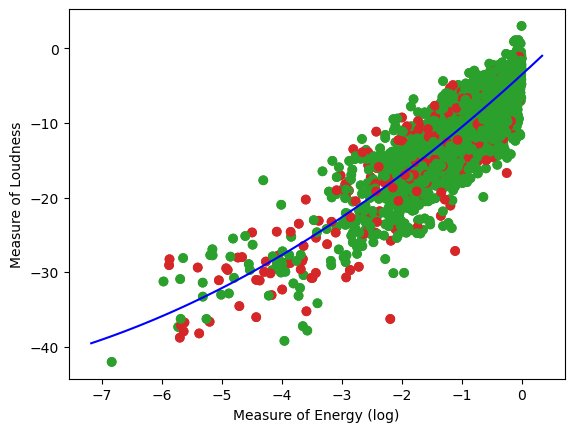

In [19]:
x = spotify_songs['logEnergy']
y = spotify_songs['loudness']
spotify_songs['logEnergy2'] = spotify_songs['logEnergy']**2

fittedmodel = smf.ols(formula="loudness ~ logEnergy + logEnergy2", data=spotify_songs).fit() 
predictions = fittedmodel.predict(spotify_songs)
residuals = y - predictions

fig, ax = pl.subplots(1,1)
pl.scatter(x, residuals, marker='o', c=cols);
ax.set(xlabel='Measure of Energy (log)', ylabel='Residual');
xmin, xmax = ax.get_xbound()
xp = [xmin,xmax]
yp = [0, 0]
pl.plot(xp, yp, 'b-');

fig, ax = pl.subplots(1,1)
pl.scatter(x, y, marker='o', c=cols);
ax.set(xlabel='Measure of Energy (log)', ylabel='Measure of Loudness');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = np.linspace(xmin, xmax, 101)
xp_array = np.array(xp)
xpmat = pd.DataFrame({'logEnergy':xp, 'logEnergy2':xp**2})
yp = fittedmodel.predict(xpmat)
yp_array = np.array(yp)
pl.plot(xp_array, yp_array, 'b-');

The fit is a little better.

[Total 40 Marks]